# Analysis 1:Time Series Analysis of Power Consumption in India (2019-2020)

### Importing the Libraries

In [ ]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go

### Loading the Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/long_data_.csv')

In [ ]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [ ]:
df.shape

(16599, 6)

In [ ]:
df.dtypes

States        object
Regions       object
latitude     float64
longitude    float64
Dates         object
Usage        float64
dtype: object

### Formating Date Column into DateTime Format

In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'])

### Group by Dates

In [ ]:
df=df.groupby('Dates',as_index=False).mean()
print(df.head())

       Dates  latitude  longitude       Usage
0 2019-01-07  23.17822  81.794533  103.736364
1 2019-01-08  23.17822  81.794533  113.951515
2 2019-01-09  23.17822  81.794533  107.836364
3 2019-01-10  23.17822  81.794533   98.045455
4 2019-01-11  23.17822  81.794533   84.463636


<ipython-input-9-7cc86dfc4f3e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.groupby('Dates',as_index=False).mean()


In [ ]:
df.shape

(498, 4)

### Selecting DateTime Column and Target Column

In [ ]:
df=df[['Dates','Usage']]

### Ploting the Data

In [ ]:
fig = px.line(df, x='Dates', y='Usage')
fig.show()

In [ ]:
df.columns = ['ds','y']

In [ ]:
df.head()

,ds,y
0,2019-01-07,103.736364
1,2019-01-08,113.951515
2,2019-01-09,107.836364
3,2019-01-10,98.045455
4,2019-01-11,84.463636


### Initialize the model

In [ ]:
model=Prophet()

### Fit the model to the Dataframe

In [ ]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3emyk9j/34epwzgz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3emyk9j/ekecypw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52656', 'data', 'file=/tmp/tmpx3emyk9j/34epwzgz.json', 'init=/tmp/tmpx3emyk9j/ekecypw6.json', 'output', 'file=/tmp/tmpx3emyk9j/prophet_modelhew159v9/prophet_model-20230512081831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:18:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

### Make Future Dataframe

In [ ]:
future_dates = model.make_future_dataframe(periods=365,freq='d',include_history=True)
future_dates.shape

(863, 1)

In [ ]:
future_dates.head()

,ds
0,2019-01-07
1,2019-01-08
2,2019-01-09
3,2019-01-10
4,2019-01-11


### Prediction of the Model

In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-07,103.380111,90.463652,116.117738,103.380111,103.380111,-0.184879,-0.184879,-0.184879,-0.184879,-0.184879,-0.184879,0.0,0.0,0.0,103.195232
1,2019-01-08,103.377977,91.599491,117.265136,103.377977,103.377977,0.650401,0.650401,0.650401,0.650401,0.650401,0.650401,0.0,0.0,0.0,104.028379
2,2019-01-09,103.375844,89.890820,115.375077,103.375844,103.375844,0.151418,0.151418,0.151418,0.151418,0.151418,0.151418,0.0,0.0,0.0,103.527261
3,2019-01-10,103.373710,89.455529,115.300017,103.373710,103.373710,-0.293238,-0.293238,-0.293238,-0.293238,-0.293238,-0.293238,0.0,0.0,0.0,103.080472
4,2019-01-11,103.371576,91.292043,115.863443,103.371576,103.371576,-0.470827,-0.470827,-0.470827,-0.470827,-0.470827,-0.470827,0.0,0.0,0.0,102.900750


### Ploting the Prediction

In [ ]:
trace_open = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat"],
    mode = 'lines',
    name="Forecast"
)
trace_high = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_upper"],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Higher uncertainty interval"
)
trace_low = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_lower"],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Lower uncertainty interval"
)
trace_close = go.Scatter(
    x = df["ds"],
    y = df["y"],
    name="Data values"
)

data = [trace_open,trace_high,trace_low,trace_close]
layout = go.Layout(title="Power consumption forecasting")
fig = go.Figure(data=data)
fig.show()

### Plot the Actual Vs Predicted without Optimization

In [ ]:
fig = go.Figure([go.Scatter(x=df['ds'], y=df['y'],mode='lines', name='Actual')])
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat'],mode='lines+markers',name='predicted'))
fig.show()

### Mean Absolute Error

In [ ]:
y_true = df['y'].values
y_pred = prediction['yhat'][:498].values 
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 7.910


### Optimizing the Model for better Forecasting

In [ ]:
model1=Prophet(daily_seasonality=True).add_seasonality(name='yearly',period=365,fourier_order=70)

### Fiting Model for Hyper Parameter Tuning

In [ ]:
model1.fit(df)

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3emyk9j/hb3bro3_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3emyk9j/5jue_v7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98616', 'data', 'file=/tmp/tmpx3emyk9j/hb3bro3_.json', 'init=/tmp/tmpx3emyk9j/5jue_v7f.json', 'output', 'file=/tmp/tmpx3emyk9j/prophet_model_qzsezwp/prophet_model-20230512082721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:27:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:27:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model1.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

### Make future dataframe for next 1 year

In [ ]:
future_dates1=model1.make_future_dataframe(periods=365)

### Predict the Datapoint for next year

In [ ]:
prediction1=model1.predict(future_dates1)

### Mean Square Value

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = df['y'].values
y_pred = prediction1['yhat'][:498].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 5.600


### Plot the Actual Vs Predicted after Optimization

In [ ]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=df['ds'], y=df['y'],mode='lines',name='Actual')])
fig.add_trace(go.Scatter(x=prediction1['ds'], y=prediction1['yhat'],mode='lines+markers',name='predicted'))
fig.show()

# Analysis 2: Time Series Analysis of Application Count (2016)

### Loading the Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/energydata_complete.csv')

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Selecting the Date and Target Column

In [ ]:
df=df[['date','Appliances']]

### Ploting the Dataframe

<Axes: >

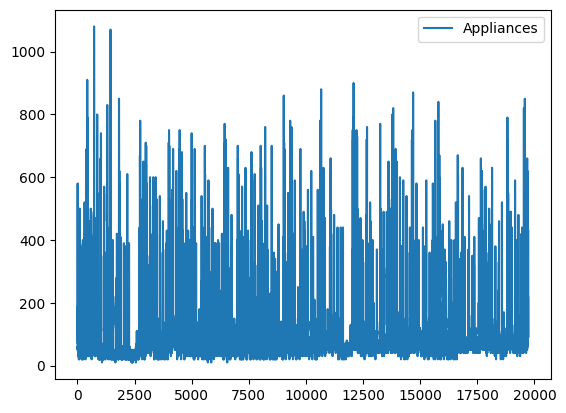

In [ ]:
df.plot()

### 3. Rename column to ds and y
    ds - datestamp column
    y - target column

In [ ]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


### Initializing Model

In [ ]:
model = Prophet()

### Fiting The Model

In [ ]:
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3emyk9j/atreo6n9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx3emyk9j/qd_4ckiu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96701', 'data', 'file=/tmp/tmpx3emyk9j/atreo6n9.json', 'init=/tmp/tmpx3emyk9j/qd_4ckiu.json', 'output', 'file=/tmp/tmpx3emyk9j/prophet_model1bwmayly/prophet_model-20230512084834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:48:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:48:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

### Create future dates of 150 days

In [ ]:
future_dates=model.make_future_dataframe(periods=150)

### Predict the target for the next 150 days

In [ ]:
prediction=model.predict(future_dates)

### Finding the Mean Absolute Error

In [ ]:
y_true = df['y'].values
y_pred = prediction['yhat'][:19735].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 52.743
